In [1]:
import os 
import ipyvolume as ipv
from tyssue import HistoryHdf5
from tyssue.draw import browse_history
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import splrep, splev
from scipy.optimize import curve_fit

from polarity.toolbox import open_sheet
import seaborn as sns

In [32]:
pos_perturb = pd.DataFrame(columns = ['p1', 'p2', 'p3', 'z1', 'z2', 'z3'])


In [33]:
SIM_DIR = '/media/admin-suz/Sophie/3_Papiers-Polarity-Manu/10_Revisions/20200205-variability'

list_dir = os.listdir(SIM_DIR)

In [34]:
d = list_dir[1]
list_simu = os.listdir(os.path.join(SIM_DIR, d))

In [35]:
for f in list_simu: 
    
    history = HistoryHdf5.from_archive(
                os.path.join(os.path.join(SIM_DIR,d),f+'/out.hf5')
                )
    sheet = history.retrieve(0)
    
    lp=sheet.face_df[sheet.face_df.is_mesoderm == 1].index
    tmp = []
    for p in lp:
        tmp.append(p)
        
    lp=sheet.face_df[sheet.face_df.is_mesoderm == 1]['z']
    for p in lp:
        tmp.append(p)
    try:
        pos_perturb.loc[f.split('_')[-1]] = tmp
    except:
        pass

In [71]:
pos_perturb.sort_index()

,p1,p2,p3,z1,z2,z3
0,393.0,471.0,1118.0,-14.543911,6.166450,-8.094340
1,732.0,1048.0,1633.0,5.931261,10.699571,-41.646623
10,349.0,705.0,952.0,0.023053,-18.384539,17.832045
11,483.0,525.0,1200.0,-42.674035,14.273755,-35.947863
12,123.0,519.0,725.0,-23.368372,-13.145066,-37.168288
13,239.0,713.0,1375.0,18.613558,-13.665708,-1.815609
14,9.0,176.0,1001.0,-10.224393,-8.757567,17.373021
15,240.0,943.0,1638.0,19.624789,6.828818,23.140358
16,83.0,939.0,1636.0,-35.651270,-31.356065,-37.546437
17,10.0,1129.0,1140.0,-11.850447,38.671223,-31.035301


In [95]:
pos_perturb_2 = pos_perturb.sort_index()
i = 30
pos_perturb_2 = pos_perturb_2[(pos_perturb_2.z1>-i) & (pos_perturb_2.z1<i)]
pos_perturb_2 = pos_perturb_2[(pos_perturb_2.z2>-i) & (pos_perturb_2.z2<i)]
pos_perturb_2 = pos_perturb_2[(pos_perturb_2.z3>-i) & (pos_perturb_2.z3<i)]

In [96]:
print(pos_perturb_2.shape)
pos_perturb_2

(21, 6)


,p1,p2,p3,z1,z2,z3
0,393.0,471.0,1118.0,-14.543911,6.166450,-8.094340
10,349.0,705.0,952.0,0.023053,-18.384539,17.832045
13,239.0,713.0,1375.0,18.613558,-13.665708,-1.815609
14,9.0,176.0,1001.0,-10.224393,-8.757567,17.373021
15,240.0,943.0,1638.0,19.624789,6.828818,23.140358
25,424.0,425.0,819.0,-4.946940,26.844739,-8.488469
26,40.0,881.0,1305.0,-18.206075,6.987509,8.909518
33,476.0,576.0,1608.0,18.302237,25.060673,-16.465391
34,234.0,325.0,1034.0,21.459117,12.384989,-27.439347
35,1154.0,1176.0,1607.0,-12.527051,-13.168379,-4.895068


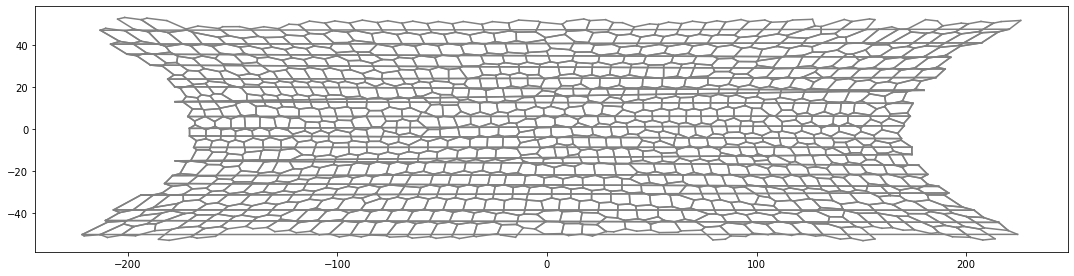

In [76]:
##Mise à plat du tissu
from math import atan2
from matplotlib.patches import Polygon, FancyArrow, Arc, PathPatch
from matplotlib.collections import PatchCollection, PolyCollection

fig = plt.figure()
ax = plt.axes()


sheet = sheet.extract_bounding_box(z_boundary=(-50,50))
#cmap = matplotlib.colors.ListedColormap(['white', 'magenta', 'magenta', 'magenta'])#, 'moccasin'])

#theta = [atan2(sheet.vert_df.y[i], sheet.vert_df.x[i]) for i in range(0, sheet.Nv)]

l_z=[]
l_rt=[]
for idx, edge in sheet.edge_df.iterrows():
    srce = int(edge["srce"])
    trgt = int(edge["trgt"])
    l_z.append(sheet.vert_df.loc[srce, 'z'])
    l_rt.append(sheet.vert_df.loc[srce, 'rho']*atan2(sheet.vert_df.loc[srce, 'y'], sheet.vert_df.loc[srce, 'x']))
    l_z.append(sheet.vert_df.loc[trgt, 'z'])
    l_rt.append(sheet.vert_df.loc[trgt, 'rho']*atan2(sheet.vert_df.loc[trgt, 'y'], sheet.vert_df.loc[trgt, 'x']))



plt.plot(l_rt[0:2],l_z[0:2], 'gray')
for i in range(0,len(l_z),2):
    plt.plot(l_rt[i:i+2],l_z[i:i+2],'gray')
   
    

ax.autoscale()
ax.set_aspect("equal")
fig.set_size_inches(18.5, 10.5, forward=True)

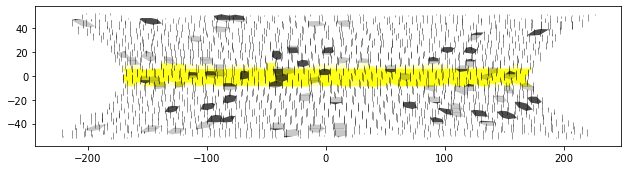

In [94]:
from matplotlib.colors import ListedColormap
from tyssue.draw import sheet_view
def draw_specs(sheet):
    cmap = ListedColormap(["white", "yellow","red", 
                           "black","black","black"])
    specs = {
        'face': {
            'visible': True,
            'color': sheet.face_df.fold + sheet.face_df.is_mesoderm*3,
            'colormap':cmap,
            'alpha':0.7,
        },
        'edge': {
            'visible': True,
            'color':'black',
        },
        'vert':{
            'visible':False,
            's':100,
            'alpha': 0.3,
            'zorder': 2,
            'color': sheet.vert_df.radial_tension

        }

    }
    return specs


list_p = []
for p in pos_perturb['p1'].to_numpy():
    list_p.append(p)
for p in pos_perturb['p2'].to_numpy():
    list_p.append(p)
for p in pos_perturb['p3'].to_numpy():
    list_p.append(p)
    
for p in list_p:
    sheet.face_df.loc[p, 'is_mesoderm']=1
sheet = sheet.extract_bounding_box(z_boundary=(-50,50))

sheet.vert_df['l_rt'] = sheet.vert_df['rho']*np.arctan2(sheet.vert_df['y'], sheet.vert_df['x'])
sheet.edge_df['dl_rt'] = np.arctan2(sheet.edge_df['dy'], sheet.edge_df['dx'])
sheet.edge_df['tl_rt'] = sheet.vert_df.loc[sheet.edge_df.srce.to_numpy()].l_rt.to_numpy()
sheet.edge_df['sl_rt'] = sheet.vert_df.loc[sheet.edge_df.srce.to_numpy()].l_rt.to_numpy()

fig, ax = sheet_view(sheet, coords=[ 'l_rt', 'z',], **draw_specs(sheet))
fig.set_size_inches(10.5, 18.5, forward=True)

# plt.savefig('test_color.eps', dpi = 300, transparent=False)

In [ ]:
datas = pd.read_csv('datas_new3_n40.csv', sep=';', index_col=0)
datas.reset_index(inplace=True)
fig, ax = plt.subplots()
colors=['red', 'blue', 'green', 'orange', 'purple', 'black']

for id_ in range(0, 40):
    
    #recuperer position perturbation
    for f in (f for f in os.listdir(os.path.join(SIM_DIR,list_dir[11])) if f.split('_')[-1] == str(id_)):
        if f.split('_')[0]=='1.0':
            history = HistoryHdf5.from_archive(
                os.path.join(os.path.join(SIM_DIR,list_dir[11]),f+'/out.hf5')
                )
            t = find_max_depth_time(history, 15)
            sheet = history.retrieve(t)
            
            sheet.face_df['latitude'] = np.arctan2(sheet.face_df.y, sheet.face_df.x)
            
            pos_perturb_z = sheet.face_df[sheet.face_df.is_mesoderm==1].z.to_numpy()
            pos_perturb_latitude = sheet.face_df[sheet.face_df.is_mesoderm==1].latitude.to_numpy()
            
            
    max_depth = []
    i=0
    for pola_ in [ 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,]:
            
        index_ = datas[(datas.id==id_)
                     & (datas.pola==pola_)
                     & (datas.perturb=='-1')].index
        fold = datas.loc[index_, 'z_depth']

        datas.loc[index_, 'fold_correct'] = fold

        max_depth.append(list(fold)[pos_max_05[id_]])
        pos_max_depth = pos_max_05[id_]
        
        #ax.scatter(list(fold)[pos_max_05[id_]], pos_max_05[id_], color='black', alpha=0.2)
            
        index_ = datas[(datas.id==id_)
                     & (datas.pola==pola_)
                     & (datas.perturb!='-1')].index
        fold = datas.loc[index_, 'z_depth']
        

        datas.loc[index_, 'fold_correct'] = fold

        max_depth.append(list(fold)[pos_max_05[id_]])
        pos_max_depth = pos_max_05[id_]
        
         
        ax.scatter(list(fold)[pos_max_05[id_]],id_, color=colors[i], alpha=0.8)
        
        def find_nearest(array, value):
            array = np.asarray(array)
            idx = (np.abs(array - value)).argmin()
            return idx
        
        zi = find_nearest(pos_perturb_latitude, datas.loc[list(index_)[pos_max_05[id_]]]['index'])
        ax.plot(pos_perturb_z[zi], id_,'k+', alpha=1)
        
        i+=1
    print(id_, datas.loc[list(index_)[pos_max_05[id_]]]['index'], pos_perturb_latitude[zi])
fig.set_size_inches(18.5, 10.5, forward=True)